In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
## the length
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0167-09.TAUX.nc')
lont = data1.variables['ULONG'][:600,500:1800]
latt = data1.variables['ULAT'][:600,500:1800]
latt[latt == -1.0] = np.nan

a = np.arange(0,600)
import math
#math.cos(math.radians(latt[:,3][399]))
wholedis = np.zeros(600)
for j in a:
    wholedis[j] = 111.34* math.cos(math.radians(latt[:,200][j]))

In [3]:
wholedis = wholedis * 1000 # 地球一度的距离(m)

In [4]:
# each layer depth (m)
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0330-12.dz.nc')
lev1 = data1.variables['dz'][:]/100

In [5]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0305-09.VVEL.nc')
plotvar = data.variables['VVEL'][0,:,:]
v = plotvar[:,:600,500:1800]

##############################################
plotvar[plotvar == -0.009999999776482582]=0
plotvar[plotvar == -1.0]=0
where_are_nan = np.isnan(plotvar)
plotvar[where_are_nan] = 0
v = v/100 # m/s

In [6]:
v.shape


(62, 600, 1300)

In [7]:
###################################
#####  volume transport
a = np.arange(0,599)
b = np.arange(0,1300)
A1= np.zeros([62,600,1300])
for j in a:
    for i in b:
        A1[:,j,i] = v[:,j,i]* lev1[:]* 0.1 * wholedis[j]
#####unit (m^3/s)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/numpy/ma/core.py:1015: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


In [8]:
A1[A1>100000000000000]=0
final = np.nansum(A1,axis=0)

In [9]:
#B1=A1[:50,:,:]
#final = np.nansum(B1,axis=0)

In [10]:
num = np.arange(1,1299,1)
stream = np.zeros([600,1300])
count = 0

stream[:,0] = final[:,0]
for i in num:
    stream[:,count+1] = stream[:,count]+final[:,i]
    count = count + 1

In [11]:
streamSV = stream/1000000

In [12]:
streamSV.min()

-80.43184864624024

In [13]:
        # Pick some of the nicer colors from the palette...
        nice_cmap=plt.get_cmap('Reds')
        lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200,240])
        #new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
        new_cmap = cols.ListedColormap(lev_cmap,"Reds")
        
        nice_levels = [0,5,10,15,20,25,30,35,40,45,50,55,60,65]
        nice_levels = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
        norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

In [14]:
#streamSV[streamSV>100] = np.nan

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


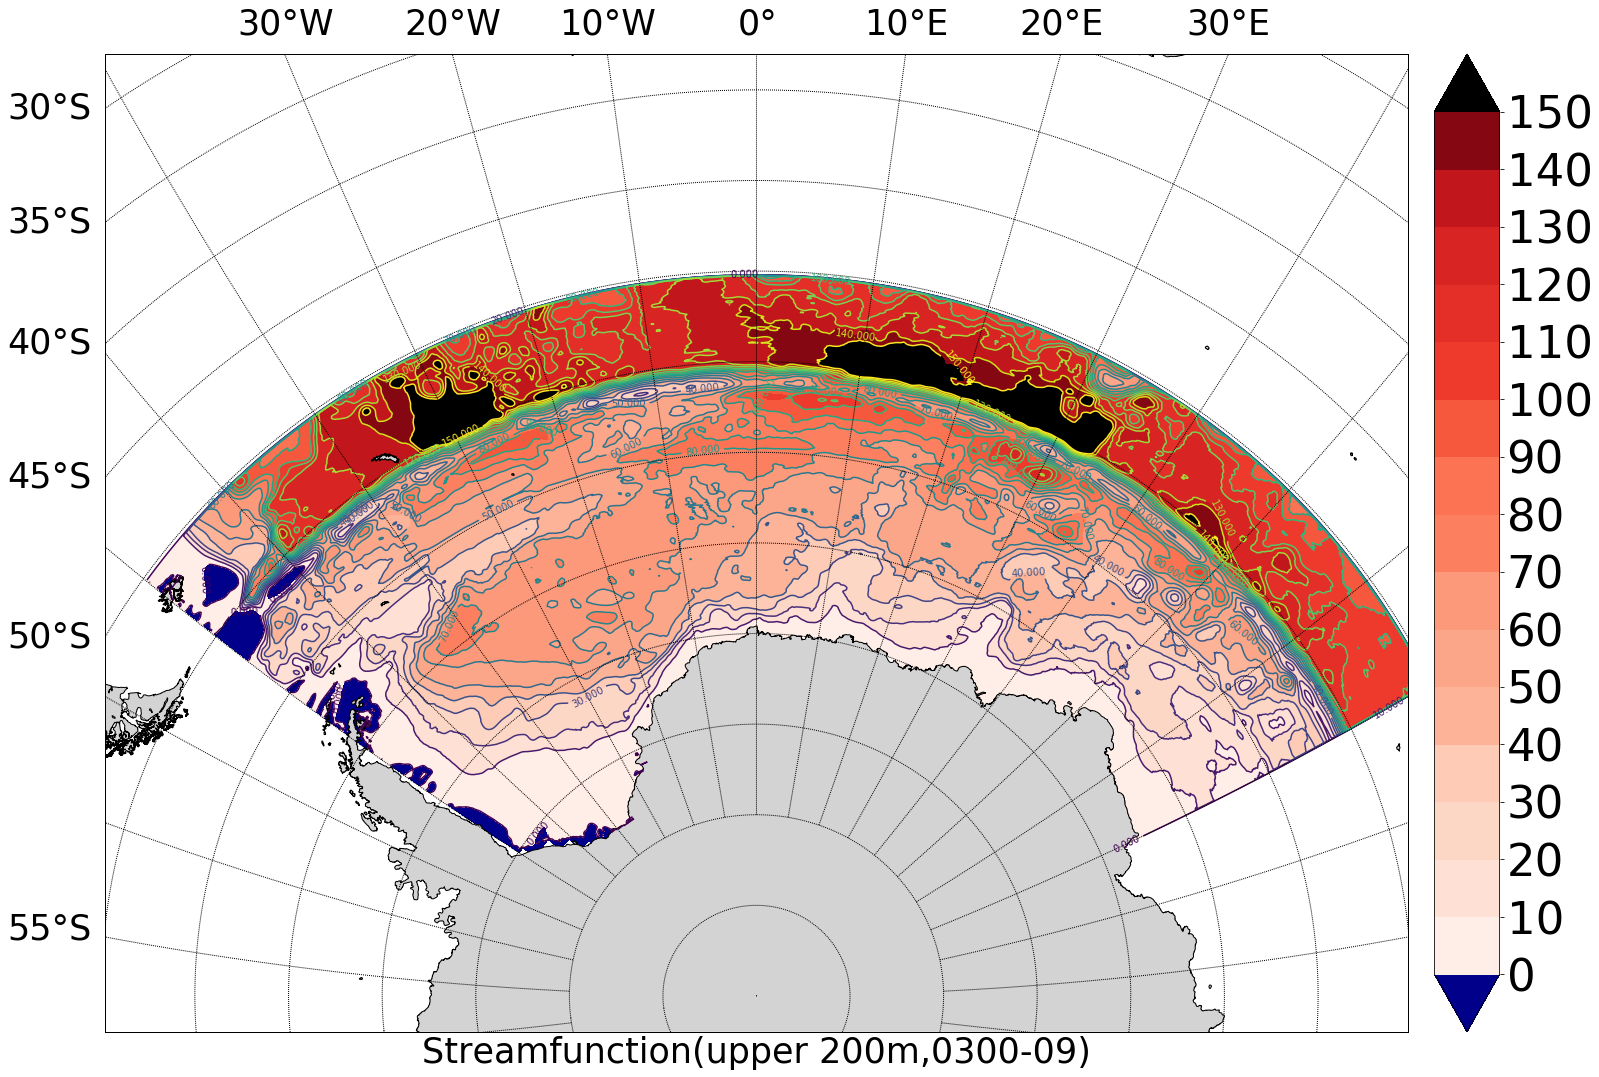

In [15]:
plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'35'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                     width = 8000000,height = 6000000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
#lw = 5*U / U.max()

CP = map.contourf(x[:,:],y[:,:],streamSV,cmap = new_cmap,levels = nice_levels,extend='both')
MP = map.contour(x,y,streamSV,'k',levels = nice_levels)
plt.clabel(MP, inline=1, fontsize=10)
CP.cmap.set_over('black')
CP.cmap.set_under('darkblue')
cbar =map.colorbar(CP,ticks=nice_levels,extendfrac='auto')
cbar.ax.tick_params(labelsize=45)
plt.xlabel("Streamfunction(upper 200m,0300-09)",**my_font)

plt.savefig("try305-09.png",bbox_inches='tight')